### 1. Look At The Data!

By printing the first few columns of each dataset, we can see how they might be combined to open up opportunities for analysis.  To do this, we need to import libraries, load the datasets into variables, and print their heads

However, in this case, it is especially worth looking through the available data to see what is potentially relevant.  In this case, we have **ten total datasets*:

1. `act_2017` - 2017 ACT participation and scores, by state
1. `act_2018` - 2018 ACT participation and scores, by state
1. `act_2019` - 2019 ACT participation and scores, by state
1. `act_2019_ca` - Detailed ACT information for high schools in California, in 2019
1. `sat_2017` - 2017 SAT participation and scores, by state
1. `sat_2018` - 2018 SAT participation and scores, by state
1. `sat_2019` - 2019 SAT participation and scores, by state
1. `sat_2019_by_intended_college_major` - 2019 SAT participation and scores, by intended college major
1. `sat_2019_ca` - Detailed SAT information for high schools in California, in 2019
1. `sat_act_by_college` - SAT and ACT score averages by college

This is a lot of data, but much of it is clearly unable to be used for our elementary data analysis:

1. The first several datasets contain ACT information, and we are concerned with the SAT.
1. We have no way to link colleges to states, so the "by college" dataset is not useful
1. Unless we choose California as our state, the California-specific datasets are of no use.

To address the most common project configuration, we will choose a non-California state: **Illinois**.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display plots in the Jupyter notebook
%matplotlib inline

# import datasets (you may have to change the directory/file names)
# note the encoding option to deal with a read error!
sat_2017 = pd.read_csv('../python-lab-data-college-board/sat_2017.csv', encoding = 'ISO-8859-1', engine='python')
sat_2018 = pd.read_csv('../python-lab-data-college-board/sat_2018.csv', encoding = 'ISO-8859-1', engine='python')
sat_2019 = pd.read_csv('../python-lab-data-college-board/sat_2019.csv', encoding = 'ISO-8859-1', engine='python')
sat_2019_by_major = pd.read_csv('../python-lab-data-college-board/sat_2019_by_intended_college_major.csv', encoding = 'ISO-8859-1', engine='python')

# as an example, print the first rows of sat_2017 using the head() method
sat_2017.head(5)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


The `sat_2017` dataset has 5 columns, as shown above.  The `sat_2018` and `sat_2019` datasets are identically organized, and the `sat_2019_by_major` contains no data that overlaps with the prior 3.

So, in my view, we have but one approach:

1. Check the usable dataset for missing values, and address any that exist.
1. Rename columns in the three `sat_YEAR` datasets to distinguish the source of each.
1. Construct one larger dataset by joining `sat_2018` and `sat_2019` on `sat_2017`, using the `state` column.
1. Explore that dataset for trends.
1. Look at the `sat_2019_by_major` dataset separately, to derive additional trends.

Let's go!

### 2. Clean The Data!

For each dataset, we will:
1. Identify columns with null values by printing null totals.
2. inspect columns with null values to determine what kind of data they contain.
3. Decide how to address the nulls based on what replacement method is most appropriate.

In [2]:
# check the number of null values, by column, in each dataset
print('Null Values by Column - \'sat_2017\' Dataset')
print(sat_2017.isnull().sum().sort_values(ascending=False), '\n')

print('Null Values by Column - \'sat_2018\' Dataset')
print(sat_2017.isnull().sum().sort_values(ascending=False), '\n')

print('Null Values by Column - \'sat_2019\' Dataset')
print(sat_2017.isnull().sum().sort_values(ascending=False), '\n')

print('Null Values by Column - \'sat_2019_by_major\' Dataset')
print(sat_2017.isnull().sum().sort_values(ascending=False), '\n')

Null Values by Column - 'sat_2017' Dataset
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64 

Null Values by Column - 'sat_2018' Dataset
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64 

Null Values by Column - 'sat_2019' Dataset
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64 

Null Values by Column - 'sat_2019_by_major' Dataset
State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total         

This dataset has **zero nulls**.

Let's check datatypes, just to be sure that there are no unforeseen compatibility issues.

In [3]:
# get information about sat_2017 datatypes
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


While we might have expected the `State` column entries to be objects (strings), the `Participation` column is comprised of objects, too, not integers or percentages.

Now, we have the following data-cleaning tasks:

1. To plot and compare values, we will have to convert the `Participation` column to integers.
1. We need to add indicators to each column name, in order to distinguish the source after joining them together.  We'll follow the following convention:

| **Old Column Name** | **New Column Name** |
| ---- | ---- | 
|`Participation` | `P_{year}` |
|`Evidence-Based Reading and Writing` | `V_{year}` |
|`Math` | `M_{year}` |
|`Total` | `T_{year}` |

In [4]:
# strip and convert the `Participation` column to integers
sat_2017['Participation'] = pd.to_numeric(sat_2017['Participation'].str.rstrip('%'))

# rename the columns
sat_2017 = sat_2017.rename(columns={'Total' : 'T_2017',
                                    'Math' : 'M_2017',
                                    'Participation' : 'P_2017',
                                    'Evidence-Based Reading and Writing' : 'V_2017'})

# print the head of the dataframe to confirm success
sat_2017.head(5)

,State,P_2017,V_2017,M_2017,T_2017
0,Alabama,5,593,572,1165
1,Alaska,38,547,533,1080
2,Arizona,30,563,553,1116
3,Arkansas,3,614,594,1208
4,California,53,531,524,1055


In [5]:
# confirm the data type change
sat_2017.dtypes

State     object
P_2017     int64
V_2017     int64
M_2017     int64
T_2017     int64
dtype: object

Let's repeat this process with our other similar dataframes.  Note that `sat_2019` has some small differences in column naming conventions; more reason to standardize!

In addition, an initial attempt to strip the "%" `sat_2019` will reveal that a few entries have erroneous values.  We'll just drop those rows, since corrupted participation data makes them unusable for an analysis about participation rates.

In [6]:
# remove the rows for for Virgin Islands and Puerto Rico in `sat_2019`
sat_2019 = sat_2019[~sat_2019['State'].isin(['Puerto Rico', 'Virgin Islands'])]

# strip and convert the `Participation` column to integers
sat_2018['Participation'] = pd.to_numeric(sat_2018['Participation'].str.rstrip('%'))
sat_2019['Participation Rate'] = pd.to_numeric(sat_2019['Participation Rate'].str.rstrip('%'))

# rename the columns
sat_2018 = sat_2018.rename(columns={'Total' : 'T_2018',
                                    'Math' : 'M_2018',
                                    'Participation' : 'P_2018',
                                    'Evidence-Based Reading and Writing' : 'V_2018'})

sat_2019 = sat_2019.rename(columns={'Total' : 'T_2019',
                                    'Math' : 'M_2019',
                                    'Participation Rate' : 'P_2019',
                                    'EBRW' : 'V_2019'})

# print the sat_2019 dataframe head to confirm success
sat_2019.head(5)

,State,P_2019,V_2019,M_2019,T_2019
0,Alabama,7,583,560,1143
1,Alaska,41,556,541,1097
2,Arizona,31,569,565,1134
3,Arkansas,6,582,559,1141
4,California,63,534,531,1065


Let's do the same investigation of the last dataframe, `sat_2019_by_major`.

In [7]:
# print the datatypes of the dataframe
sat_2019_by_major.dtypes

IntendedCollegeMajor    object
TestTakers              object
Percent                 object
Total                    int64
ReadingWriting           int64
Math                     int64
dtype: object

Once again, we see that there are some surprise object columns: `TestTakers` and `Percent`.  So, we can add the following data cleaning tasks to our prior set:

1. Convert the `TestTakers` and `Percent` columns to integers.
1. Rename the columns to follow the prior convention, just for consistency.

| **Old Column Name** | **New Column Name** |
| :---- | :---- | 
| `IntendedCollegeMajor` | `Major` |
| `TestTakers` | `N_major` |
| `Percent` | `P_major` |
| `Total` | `T_major` |
| `ReadingWriting` | `V_major` |
| `Math` | `M_major` |

In [8]:
# strip the commas from the `TestTakers` and convert to numeric
sat_2019_by_major['TestTakers'] = sat_2019_by_major['TestTakers'].str.replace(',', '')
sat_2019_by_major['TestTakers'] = pd.to_numeric(sat_2019_by_major['TestTakers'])

# strip the "%" from the `Percent` column and convert to numeric
sat_2019_by_major['Percent'] = pd.to_numeric(sat_2019_by_major['Percent'].str.rstrip('%'))


# rename the columns
sat_2019_by_major = sat_2019_by_major.rename(columns={'IntendedCollegeMajor' : 'Major',
                                                      'TestTakers' : 'N_major',
                                                      'Percent' : 'P_major',
                                                      'Total' : 'T_major',
                                                      'ReadingWriting' : 'V_major',
                                                      'Math' : 'M_major'})

# print the sat_2019 dataframe head to confirm success
sat_2019_by_major.head(5)

,Major,N_major,P_major,T_major,V_major,M_major
0,"Agriculture, AgricultureOperations, and Relate...",24913,1,977,496,481
1,Architecture and Related Services,28988,2,1047,520,527
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0,1040,536,504
3,Biological and Biomedical Sciences,155834,8,1139,572,566
4,"Business, Management, Marketing, and Related S...",221523,12,1072,534,537


### 3. Join The Datasets!

This join will be relatively simple:

1. Use `sat_2017` as the base dataframe.
1. Left join `sat_2018` onto it using `State` as the shared basis.
1. Repeat that with `sat_2019`, forming one dataframe with data from 2017-2019 by state.

The `sat_2019_by_major` dataframe was reformatted to match the convention, but will stand alone since it has no state information.

In [9]:
# initialize the new master dataframe, `sat`, using the `sat_2017` dataframe
sat = sat_2017

# join `sat_2018` and `sat_2019` using two successive merges
sat = pd.merge(sat,
               sat_2018,
               how = 'left',
               left_on = 'State',
               right_on = 'State')

sat = pd.merge(sat,
               sat_2019,
               how = 'left',
               left_on = 'State',
               right_on = 'State')

# print the head to check for a proper join
sat.head()

,State,P_2017,V_2017,M_2017,T_2017,P_2018,V_2018,M_2018,T_2018,P_2019,V_2019,M_2019,T_2019
0,Alabama,5,593,572,1165,6,595,571,1166,7,583,560,1143
1,Alaska,38,547,533,1080,43,562,544,1106,41,556,541,1097
2,Arizona,30,563,553,1116,29,577,572,1149,31,569,565,1134
3,Arkansas,3,614,594,1208,5,592,576,1169,6,582,559,1141
4,California,53,531,524,1055,60,540,536,1076,63,534,531,1065


We could have chosen to arrange this dataframe with multiple rows per state and an additional `Year` column to allow for easier grouping.  That approach has advantages and disadvantages, depending on what eventual analysis is desired.

I chose the above structure for two reasons:

1. Since we are instructed to compare one state's information, having one row per state is convenient.
1. The prompt for this assignment stipulates that we should be joining dataframes; if I were to create one row per state, per year, we could simply stack all of the dataframes by appending them to one another after adding a `Year` column to each one.

### 4. Conduct Analysis!

For example, let's choose **Illinois**.  Our analysis will focus on the following questions:

1. Is there any link, in general, between participation and performance?
1. What majors have the greatest participation?
1. What is Illinois' participation trend?

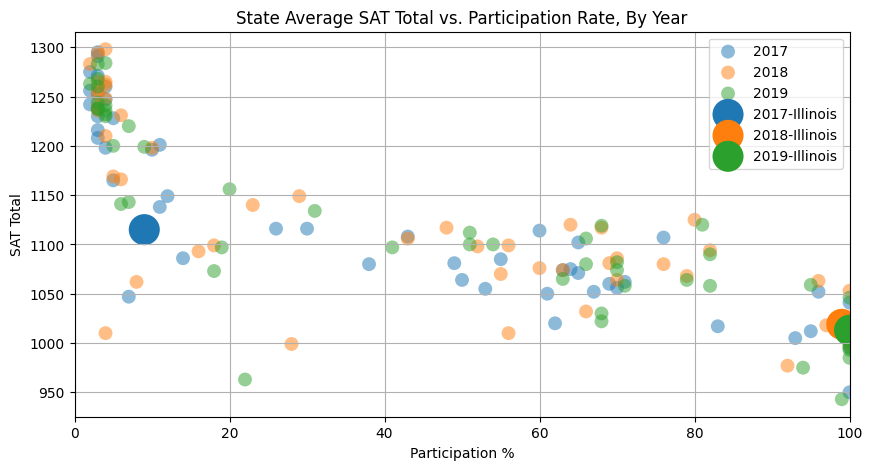

In [10]:
# scatter plot participation by year
fig, ax = plt.subplots(figsize = (10, 5))

colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = ['2017', '2018', '2019']
x_data = ['P_2017', 'P_2018', 'P_2019']
y_data = ['T_2017', 'T_2018', 'T_2019']
state = 'Illinois'

# plot all values
for idx in range(0, len(x_data)):
    x = sat[x_data[idx]]
    y = sat[y_data[idx]]
    ax.scatter(x, y, c = colors[idx], label = labels[idx], alpha = 0.5, s = 100, edgecolors = 'none')

# replot Illinois values to highlight them
for idx in range(0, len(x_data)):
    x = sat[x_data[idx]].loc[sat['State'] == state]
    y = sat[y_data[idx]].loc[sat['State'] == state]
    ax.scatter(x, y, c = colors[idx], label = labels[idx] + '-' + state, alpha = 1.0, s = 500, edgecolors = 'none')

# format and plot
ax.set(xlabel = 'Participation %',
       ylabel = 'SAT Total',
       xlim = (0, 100),
       title = 'State Average SAT Total vs. Participation Rate, By Year')
ax.legend()
ax.grid(True)
plt.show()

In [11]:
# Illinois' participation data
print(sat[['State', 'P_2017', 'P_2018', 'P_2019']].loc[sat['State'] == 'Illinois'])

       State  P_2017  P_2018  P_2019
13  Illinois       9      99     100


In [12]:
# top 5 majors by SAT participation
sat_2019_by_major.sort_values('P_major', ascending = False).head(5)

,Major,N_major,P_major,T_major,V_major,M_major
14,Health Professions and related Clinical Sciences,331026,18,1048,529,518
4,"Business, Management, Marketing, and Related S...",221523,12,1072,534,537
9,Engineering,194127,11,1139,559,581
3,Biological and Biomedical Sciences,155834,8,1139,572,566
35,"Visual and Performing Arts, General",130642,7,1045,536,510


In [13]:
# majors with zero SAT participation
sat_2019_by_major[sat_2019_by_major['P_major'] == 0]

,Major,N_major,P_major,T_major,V_major,M_major
2,"Area, Ethnic, Cultural, and Gender Studies",2629,0,1040,536,504
7,"Construction Trades, General",2500,0,919,459,460
12,Family and Consumer Sciences/Human Sciences,6469,0,953,484,469
17,"Liberal Arts and Sciences, General Studies and...",8611,0,1140,584,556
18,Library Science/Librarianship,283,0,1105,577,527
20,Mechanic and Repair Technologies/Technicians,6592,0,916,458,458
21,Military Technologies,7448,0,984,498,486
22,Multi/Interdisciplinary Studies,2979,0,1155,581,574
25,"Personal and Culinary Services, General",6668,0,929,474,456
26,Philosophy and Religious Studies,3381,0,1120,572,548


#### So, what conclusions or hypothesis can we draw from these initial analyses?

1. There appears to be an inverse relationship between statewide SAT participation rate and statewide average SAT score.  This could be due to selection bias; in states where participation is lower, perhaps students who are likely to do well on the SAT are more likely to seek it out.

1. Illinois' participation data is somewhat perplexing; the participation leaps from 9% in 2017 to 99% in 2018 and 100% in 2019, while other states' participation rates do not change.  This could indicate a problem with the data, or that some critical features are missing from the dataset.  At present, it is difficult to draw any conclusions from participation rate alone.

1. Some intended majors have a much higher associated SAT participation rate than others.  So, to increase participation rate in any given state, one could recommend additional investment in programs related to those majors (health professions, business programs, and engineering).  If more students intent to pursue those majors, we would expect more students to take the SAT.

1. If funding is limited and SAT participation is the primary goal, funding to support increased investment in the aforementioned programs could be taken from programs that support majors with zero associated SAT participation.